In [1]:
import pandas as pd

# Load dataset
file_path = '/Users/prantarborah/Downloads/Metaphor Detection/train-1.csv'
data = pd.read_csv(file_path)


data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   metaphorID  1870 non-null   int64 
 1   label       1870 non-null   bool  
 2   text        1870 non-null   object
dtypes: bool(1), int64(1), object(1)
memory usage: 31.2+ KB


(   metaphorID  label                                               text
 0           0   True  Hey , Karen !!!! I was told that on the day of...
 1           2  False  Hi Ladies ... my last chemo was Feb 17/09 , ra...
 2           2  False  I have just come form my consult with a lovely...
 3           4  False  I also still question taking Tamox for stage 1...
 4           2  False  Just checking in to say hello ladies . I had a...,
 None)

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Display a sample of the preprocessed data
data[['text', 'cleaned_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prantarborah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prantarborah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,"Hey , Karen !!!! I was told that on the day of...",hey karen told day diagnosis survivor certainl...
1,"Hi Ladies ... my last chemo was Feb 17/09 , ra...",hi ladies last chemo feb 17 09 rads finished a...
2,I have just come form my consult with a lovely...,come form consult lovely ps thin left implant ...
3,I also still question taking Tamox for stage 1...,also still question taking tamox stage 1 grade...
4,Just checking in to say hello ladies . I had a...,checking say hello ladies long busy day got al...


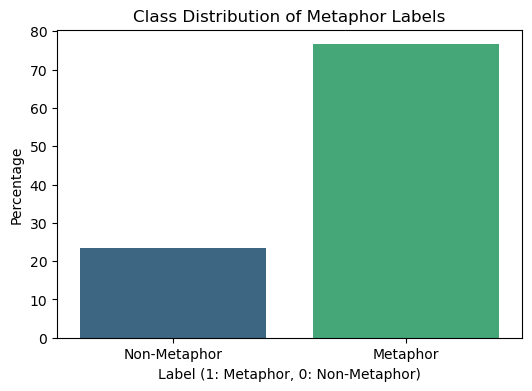

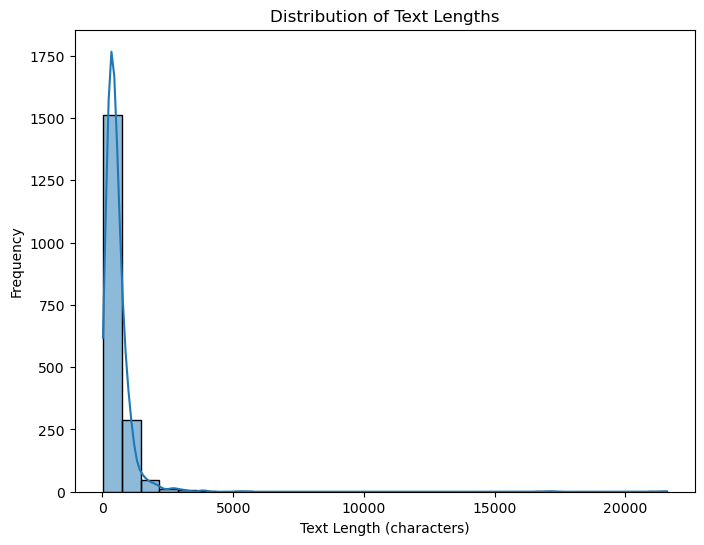

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# Check class distribution
label_distribution = data['label'].value_counts(normalize=True) * 100

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title("Class Distribution of Metaphor Labels")
plt.xlabel("Label (1: Metaphor, 0: Non-Metaphor)")
plt.ylabel("Percentage")
plt.xticks([0, 1], ["Non-Metaphor", "Metaphor"])
plt.show()

# Text length distribution
data['text_length'] = data['cleaned_text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [4]:
data

,metaphorID,label,text,cleaned_text,text_length
0,0,True,"Hey , Karen !!!! I was told that on the day of...",hey karen told day diagnosis survivor certainl...,283
1,2,False,"Hi Ladies ... my last chemo was Feb 17/09 , ra...",hi ladies last chemo feb 17 09 rads finished a...,248
2,2,False,I have just come form my consult with a lovely...,come form consult lovely ps thin left implant ...,445
3,4,False,I also still question taking Tamox for stage 1...,also still question taking tamox stage 1 grade...,124
4,2,False,Just checking in to say hello ladies . I had a...,checking say hello ladies long busy day got al...,668
...,...,...,...,...,...
1865,4,True,Hi there . I found my lump 3 weeks ago and it ...,hi found lump 3 weeks ago snowball ride roller...,700
1866,4,True,Robyn-Sorry you find yourself on this web site...,robyn sorry find web site happy found 45 5 7 y...,398
1867,0,True,I 'm happy Jule that you posted this question ...,happy jule posted question taking arimidex 9 m...,666
1868,5,True,Hiya April RADs-I should probably have been he...,hiya april rads probably along joined march ra...,143


## Highlighting the imbalance for all IDs and lack of enough training data for some IDs

In [5]:
data.groupby(['metaphorID','label']).count()

text  cleaned_text  text_length
metaphorID label                                 
0          False    94            94           94
           True    635           635          635
1          False    11            11           11
           True      3             3            3
2          False   133           133          133
           True    352           352          352
3          False    13            13           13
           True      3             3            3
4          False   124           124          124
           True    169           169          169
5          False    26            26           26
           True     71            71           71
6          False    37            37           37
           True    199           199          199

In [6]:
!pip3 install xgboost

Logictic Regression and XGBoost with TF-IDF for Feature Generation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

data['label']=data['label'].astype(int)
y=data['label']
# Generate TF-IDF embeddings
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Reduce dimensionality
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text']).toarray()

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Logistic Regression Results
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost Results
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.22      0.35        88
           1       0.80      0.99      0.89       286

    accuracy                           0.81       374
   macro avg       0.83      0.60      0.62       374
weighted avg       0.82      0.81      0.76       374

Accuracy: 0.8074866310160428


/Users/prantarborah/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        88
           1       0.88      0.93      0.91       286

    accuracy                           0.86       374
   macro avg       0.81      0.77      0.79       374
weighted avg       0.85      0.86      0.85       374

Accuracy: 0.8556149732620321


Running same models on Word2Vec feature generation

In [8]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize the cleaned text for Word2Vec
tokenized_text = [text.split() for text in data['cleaned_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4, seed=42)

# Function to create sentence embeddings by averaging word vectors
def sentence_to_vector(sentence, model, vector_size):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

# Generate sentence embeddings for the dataset
vector_size = 100
data['sentence_vector'] = data['cleaned_text'].apply(lambda x: sentence_to_vector(x, word2vec_model, vector_size))
X_word2vec = np.vstack(data['sentence_vector'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Logistic Regression Results
print("Logistic Regression Results (Word2Vec):")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost Results
print("\nXGBoost Results (Word2Vec):")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Results (Word2Vec):
              precision    recall  f1-score   support

           0       0.67      0.05      0.09        88
           1       0.77      0.99      0.87       286

    accuracy                           0.77       374
   macro avg       0.72      0.52      0.48       374
weighted avg       0.75      0.77      0.68       374

Accuracy: 0.7700534759358288


/Users/prantarborah/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results (Word2Vec):
              precision    recall  f1-score   support

           0       0.53      0.30      0.38        88
           1       0.81      0.92      0.86       286

    accuracy                           0.77       374
   macro avg       0.67      0.61      0.62       374
weighted avg       0.74      0.77      0.75       374

Accuracy: 0.7727272727272727


Running same models on GloVe embeddings for feature generation

In [9]:
import os
glove_extracted_path="/Users/prantarborah/Downloads/glove.6B"
# Load GloVe embeddings (using the 100-dimensional vector file)
glove_file_path = os.path.join(glove_extracted_path, "glove.6B.100d.txt")
glove_embeddings = {}
with open(glove_file_path, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_embeddings[word] = vector

# Function to create sentence embeddings using GloVe
def sentence_to_glove_vector(sentence, embeddings, vector_size):
    words = sentence.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if not word_vectors:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

# Generate GloVe sentence embeddings for the dataset
vector_size = 100
data['sentence_vector_glove'] = data['cleaned_text'].apply(
    lambda x: sentence_to_glove_vector(x, glove_embeddings, vector_size)
)
X_glove = np.vstack(data['sentence_vector_glove'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Logistic Regression Results
print("Logistic Regression Results (GloVe):")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost Results
print("\nXGBoost Results (GloVe):")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Logistic Regression Results (GloVe):
              precision    recall  f1-score   support

           0       0.72      0.38      0.49        88
           1       0.83      0.95      0.89       286

    accuracy                           0.82       374
   macro avg       0.77      0.66      0.69       374
weighted avg       0.81      0.82      0.80       374

Accuracy: 0.8181818181818182


/Users/prantarborah/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:17:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results (GloVe):
              precision    recall  f1-score   support

           0       0.61      0.40      0.48        88
           1       0.83      0.92      0.88       286

    accuracy                           0.80       374
   macro avg       0.72      0.66      0.68       374
weighted avg       0.78      0.80      0.78       374

Accuracy: 0.7994652406417112


In [10]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to create sentence embeddings using BERT
def sentence_to_bert_vector(sentence, tokenizer, model):
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**tokens)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # Take the [CLS] token's embedding
    return cls_embedding.squeeze().numpy()

# Generate BERT sentence embeddings for the dataset
data['sentence_vector_bert'] = data['cleaned_text'].apply(
    lambda x: sentence_to_bert_vector(x, tokenizer, bert_model)
)
X_bert = np.vstack(data['sentence_vector_bert'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Logistic Regression Results
print("Logistic Regression Results (BERT):")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost Results
print("\nXGBoost Results (BERT):")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


/Users/prantarborah/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally 

Logistic Regression Results (BERT):
              precision    recall  f1-score   support

           0       0.63      0.53      0.58        88
           1       0.86      0.90      0.88       286

    accuracy                           0.82       374
   macro avg       0.74      0.72      0.73       374
weighted avg       0.81      0.82      0.81       374

Accuracy: 0.8155080213903744


/Users/prantarborah/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:20:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results (BERT):
              precision    recall  f1-score   support

           0       0.67      0.25      0.36        88
           1       0.81      0.96      0.88       286

    accuracy                           0.79       374
   macro avg       0.74      0.61      0.62       374
weighted avg       0.77      0.79      0.76       374

Accuracy: 0.7941176470588235


Using BERT  embeddings on Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to create sentence embeddings using BERT
def sentence_to_bert_vector(sentence, tokenizer, model):
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**tokens)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # Take the [CLS] token's embedding
    return cls_embedding.squeeze().numpy()

# Generate BERT sentence embeddings for the dataset
data['sentence_vector_bert'] = data['cleaned_text'].apply(
    lambda x: sentence_to_bert_vector(x, tokenizer, bert_model)
)
X_bert = np.vstack(data['sentence_vector_bert'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Results
print("Random Forest Results (BERT):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

/Users/prantarborah/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally 

Random Forest Results (BERT):
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        88
           1       0.79      0.98      0.87       286

    accuracy                           0.78       374
   macro avg       0.73      0.56      0.55       374
weighted avg       0.76      0.78      0.72       374

Accuracy: 0.7807486631016043


In [12]:
data['label'].value_counts()


1    1432
0     438
Name: label, dtype: int64

In [13]:
# Extract minority class samples (class 0)
minority_class_samples = data[data['label'] == 0]['cleaned_text']

# Display the first few minority class samples
minority_class_samples.head()


1    hi ladies last chemo feb 17 09 rads finished a...
2    come form consult lovely ps thin left implant ...
3    also still question taking tamox stage 1 grade...
4    checking say hello ladies long busy day got al...
6    hello jodi going ok 3rd chemo treatment one go...
Name: cleaned_text, dtype: object

In [14]:
!pip3 install tensorflow 

In [15]:
import os
data.info()

data_export_clean = data[['metaphorID', 'label', 'text', 'cleaned_text']]
data_export_clean

# Save the DataFrame to a CSV file
file_path = "/Users/prantarborah/Downloads/Metaphor Detection/preprocessed_data.csv"  
data_export_clean.to_csv(file_path, index=False)

print(f"DataFrame saved successfully to {file_path}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   metaphorID             1870 non-null   int64 
 1   label                  1870 non-null   int64 
 2   text                   1870 non-null   object
 3   cleaned_text           1870 non-null   object
 4   text_length            1870 non-null   int64 
 5   sentence_vector        1870 non-null   object
 6   sentence_vector_glove  1870 non-null   object
 7   sentence_vector_bert   1870 non-null   object
dtypes: int64(3), object(5)
memory usage: 117.0+ KB
DataFrame saved successfully to /Users/prantarborah/Downloads/Metaphor Detection/preprocessed_data.csv


In [16]:
data_export_meta=data[['metaphorID', 'label', 'text', 'cleaned_text', 'sentence_vector_bert']]
# Save the DataFrame to a CSV file
file_path = "/Users/prantarborah/Downloads/Metaphor Detection/data_meta_with_BERT_emb.csv"  
data_export_meta.to_csv(file_path, index=False)

print(f"DataFrame saved successfully to {file_path}")

DataFrame saved successfully to /Users/prantarborah/Downloads/Metaphor Detection/data_meta_with_BERT_emb.csv


In [24]:
data_export_meta

,metaphorID,label,text,cleaned_text,sentence_vector_bert
0,0,1,"Hey , Karen !!!! I was told that on the day of...",hey karen told day diagnosis survivor certainl...,"[0.034522273, 0.24328876, 0.17264238, -0.29355..."
1,2,0,"Hi Ladies ... my last chemo was Feb 17/09 , ra...",hi ladies last chemo feb 17 09 rads finished a...,"[-0.05570196, -0.12548442, 0.30307654, -0.1463..."
2,2,0,I have just come form my consult with a lovely...,come form consult lovely ps thin left implant ...,"[-0.4342476, -0.1992934, 0.53321385, -0.442282..."
3,4,0,I also still question taking Tamox for stage 1...,also still question taking tamox stage 1 grade...,"[-0.13575293, 0.14313132, 0.20749079, -0.25574..."
4,2,0,Just checking in to say hello ladies . I had a...,checking say hello ladies long busy day got al...,"[0.2807985, 0.026378985, 0.6095898, -0.0113635..."
...,...,...,...,...,...
1865,4,1,Hi there . I found my lump 3 weeks ago and it ...,hi found lump 3 weeks ago snowball ride roller...,"[-0.1381766, -0.1379154, 0.56367576, -0.060144..."
1866,4,1,Robyn-Sorry you find yourself on this web site...,robyn sorry find web site happy found 45 5 7 y...,"[-0.08134038, 0.15553936, 0.51968825, -0.00409..."
1867,0,1,I 'm happy Jule that you posted this question ...,happy jule posted question taking arimidex 9 m...,"[-0.26941118, -0.1443513, 0.20701148, 0.033163..."
1868,5,1,Hiya April RADs-I should probably have been he...,hiya april rads probably along joined march ra...,"[0.019148394, -0.3875703, 0.25172782, -0.32306..."


In [18]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical

file_path = '/Users/prantarborah/Downloads/Metaphor Detection/data_meta_with_BERT_emb.csv'
data_BERT_LSTM = pd.read_csv(file_path)

# Convert the 'sentence_vector_bert' column from string to numpy array
data_BERT_LSTM['sentence_vector_bert'] = data_BERT_LSTM['sentence_vector_bert'].apply(eval)
X = np.array(data['sentence_vector_bert'].tolist())  

# Labels
y = data_BERT_LSTM['label']
y_categorical = to_categorical(y)  # Convert labels to categorical format

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y)

# Reshape for LSTM Input (Add a timesteps dimension)
X_train = np.expand_dims(X_train, axis=1)  # Shape: (samples, timesteps=1, features)
X_test = np.expand_dims(X_test, axis=1)




SyntaxError: invalid syntax. Perhaps you forgot a comma? (<string>, line 1)

0       [,3.45222726e-02,2.43288755e-01,1.72642380e-01...
1       [-5.57019599e-02,-1.25484422e-01,3.03076535e-0...
2       [-4.34247613e-01,-1.99293405e-01,5.33213854e-0...
3       [-1.35752931e-01,1.43131316e-01,2.07490787e-01...
4       [,2.80798495e-01,2.63789855e-02,6.09589815e-01...
                              ...                        
1865    [-1.38176605e-01,-1.37915403e-01,5.63675761e-0...
1866    [-8.13403800e-02,1.55539364e-01,5.19688249e-01...
1867    [-2.69411176e-01,-1.44351304e-01,2.07011476e-0...
1868    [,1.91483945e-02,-3.87570292e-01,2.51727819e-0...
1869    [-1.14314340e-01,2.40465879e-01,2.74799585e-01...
Name: sentence_vector_bert, Length: 1870, dtype: object

In [ ]:
# Step 4: Define the Bi-LSTM Model
model_LSTM = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(216, activation='relu'),
    Dropout(0.1),
    Dense(108, activation='relu'),
    Dense(54, activation='relu'),
    Dropout(0.1),
    Dense(28, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (output is a single neuron)
])

# Model Summary
model_LSTM.summary()

# Step 5: Define Model Checkpoint and Compile the Model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Use Binary Cross-Entropy for loss as this is a binary classification task
model_LSTM.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.000005),  # Adjust learning rate as needed
    metrics=['accuracy']
)

# Step 6: Train the Model
num_epochs = 350
history = model_LSTM.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[model_checkpoint],
    verbose=1
)

# Step 7: Load Best Model and Evaluate
model_LSTM.load_weights('best_model.h5')
y_pred = model_LSTM.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Binary threshold at 0.5
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Bi-LSTM with Pre-Extracted BERT Embeddings Results:")
print(classification_report(y_test_classes, y_pred_classes.flatten()))
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes.flatten()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   metaphorID             1870 non-null   int64 
 1   label                  1870 non-null   int64 
 2   text                   1870 non-null   object
 3   cleaned_text           1870 non-null   object
 4   text_length            1870 non-null   int64 
 5   sentence_vector        1870 non-null   object
 6   sentence_vector_glove  1870 non-null   object
 7   sentence_vector_bert   1870 non-null   object
dtypes: int64(3), object(5)
memory usage: 117.0+ KB


In [ ]:
data

,metaphorID,label,text,cleaned_text,text_length,sentence_vector,sentence_vector_glove,sentence_vector_bert
0,0,1,"Hey , Karen !!!! I was told that on the day of...",hey karen told day diagnosis survivor certainl...,283,"[0.31213966, -0.010568881, -0.37590262, -0.004...","[0.011973815, 0.3307386, 0.13183956, -0.152963...","[0.034522273, 0.24328876, 0.17264238, -0.29355..."
1,2,0,"Hi Ladies ... my last chemo was Feb 17/09 , ra...",hi ladies last chemo feb 17 09 rads finished a...,248,"[0.24677078, 0.01272915, -0.3007283, 0.0127553...","[0.11969786, 0.113061525, 0.14124274, -0.14811...","[-0.05570196, -0.12548442, 0.30307654, -0.1463..."
2,2,0,I have just come form my consult with a lovely...,come form consult lovely ps thin left implant ...,445,"[0.19779074, -0.013602355, -0.26675695, 0.0077...","[-0.14916608, 0.2203094, 0.18455322, -0.163568...","[-0.4342476, -0.1992934, 0.53321385, -0.442282..."
3,4,0,I also still question taking Tamox for stage 1...,also still question taking tamox stage 1 grade...,124,"[0.37614146, -0.01080904, -0.46636695, -0.0109...","[-0.06074404, 0.4083623, 0.08131759, 0.0104588...","[-0.13575293, 0.14313132, 0.20749079, -0.25574..."
4,2,0,Just checking in to say hello ladies . I had a...,checking say hello ladies long busy day got al...,668,"[0.27626806, -0.02645339, -0.39325893, 0.01993...","[-0.038645927, 0.30600142, 0.2552486, -0.30801...","[0.2807985, 0.026378985, 0.6095898, -0.0113635..."
...,...,...,...,...,...,...,...,...
1865,4,1,Hi there . I found my lump 3 weeks ago and it ...,hi found lump 3 weeks ago snowball ride roller...,700,"[0.3005386, -0.019516217, -0.40387028, 0.00247...","[-0.12366917, 0.24861155, 0.14419958, -0.19055...","[-0.1381766, -0.1379154, 0.56367576, -0.060144..."
1866,4,1,Robyn-Sorry you find yourself on this web site...,robyn sorry find web site happy found 45 5 7 y...,398,"[0.30239877, -0.053072788, -0.46254945, 0.0159...","[-0.06362894, 0.34791276, 0.31719136, -0.28301...","[-0.08134038, 0.15553936, 0.51968825, -0.00409..."
1867,0,1,I 'm happy Jule that you posted this question ...,happy jule posted question taking arimidex 9 m...,666,"[0.25426742, -0.022269726, -0.35961765, 0.0154...","[-0.04121671, 0.2396224, 0.25544712, -0.170382...","[-0.26941118, -0.1443513, 0.20701148, 0.033163..."
1868,5,1,Hiya April RADs-I should probably have been he...,hiya april rads probably along joined march ra...,143,"[0.27323878, -0.02047119, -0.3780339, 0.009696...","[0.079611644, 0.041873682, 0.028484438, -0.292...","[0.019148394, -0.3875703, 0.25172782, -0.32306..."
